# US Cities

To illustrate the use of multidimensional scaling and cluster analysis we first work with a distance matrix that measure the distances between major US cities.

In [1]:
library(ggpubr)
library(smacof)
library(vegan)
library(factoextra)

Loading required package: ggplot2

Loading required package: plotrix

Loading required package: colorspace

Loading required package: e1071


Attaching package: ‘smacof’


The following object is masked from ‘package:base’:

    transform


Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [41]:
# Read CSV2: By default it sets header = TRUE and sep = ";"
# Because the first column are not values but row names, we indicate
# this by setting row.names to 1.
cities <- read.csv2("../data/us_dist.csv", row.names = 1)
cities

,BOSTON,NY,DC,MIAMI,CHICAGO,SEATTLE,SF,LA,DENVER
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
BOSTON,0,206,429,1504,963,2976,3095,2979,1949
NY,206,0,233,1308,802,2815,2934,2786,1771
DC,429,233,0,1075,671,2684,2799,2631,1616
MIAMI,1504,1308,1075,0,1329,3273,3053,2687,2037
CHICAGO,963,802,671,1329,0,2013,2142,2054,996
SEATTLE,2976,2815,2684,3273,2013,0,808,1131,1307
SF,3095,2934,2799,3053,2142,808,0,379,1235
LA,2979,2786,2631,2687,2054,1131,379,0,1059
DENVER,1949,1771,1616,2037,996,1307,1235,1059,0


In [23]:
# We coerce the matrix to belong to a distance matrix.
cities_distance <- as.dist(cities)
cities_distance

        BOSTON   NY   DC MIAMI CHICAGO SEATTLE   SF   LA
NY         206                                          
DC         429  233                                     
MIAMI     1504 1308 1075                                
CHICAGO    963  802  671  1329                          
SEATTLE   2976 2815 2684  3273    2013                  
SF        3095 2934 2799  3053    2142     808          
LA        2979 2786 2631  2687    2054    1131  379     
DENVER    1949 1771 1616  2037     996    1307 1235 1059

In [24]:
# We perform metric multidimensionsal scaling.
mds <- cmdscale(cities_distance)
mds # Output of cmdscale is a matrix with coordinates.

BOSTON,-1348.6683,-462.40060
NY,-1198.8741,-306.54690
DC,-1076.9855,-136.43204
MIAMI,-1226.9390,1013.62838
CHICAGO,-428.4548,-174.60316
SEATTLE,1596.1594,-639.30777
SF,1697.2283,131.68586
LA,1464.0470,560.58046
DENVER,522.4871,13.39576


In [26]:
mds <- -mds # MDS Change the sign so north is up.
mds <- as.data.frame(mds)
colnames(mds) <- c("Dim.1", "Dim.2")

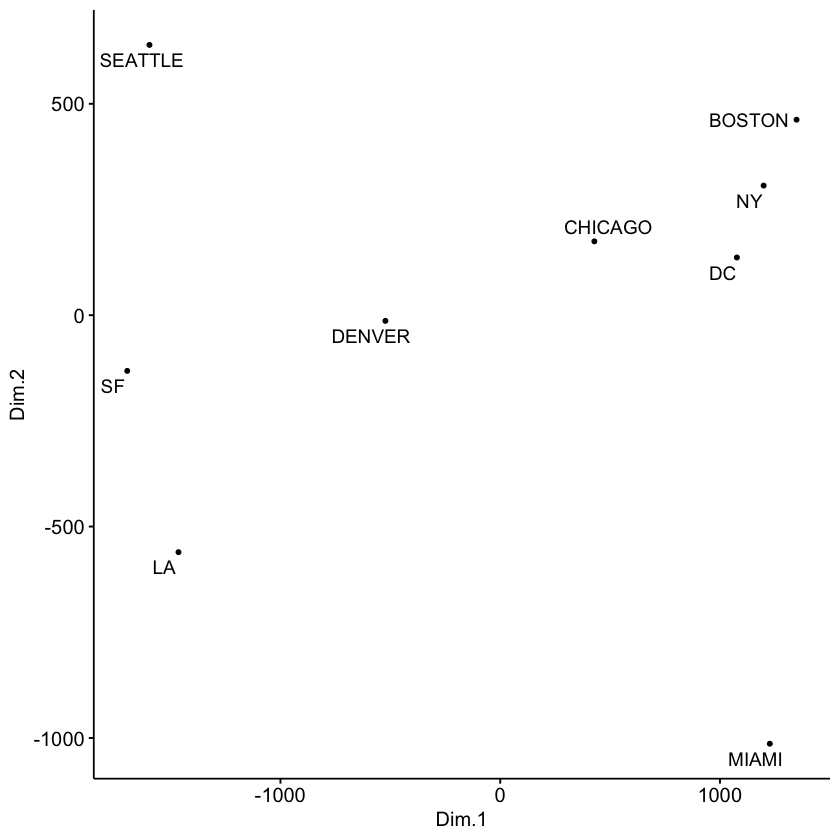

In [27]:
ggscatter(mds, x = "Dim.1", y = "Dim.2", 
          label = colnames(cities),
          size = 1,
          repel = TRUE)
# What you should see is a map of the US but the orientation is wrong. we can 
# easily solve this by multiplying the coordinates by -1. so uncomment the 
# above line and run the script again. cmdscale does not give you stress values 
# as it works through svd.

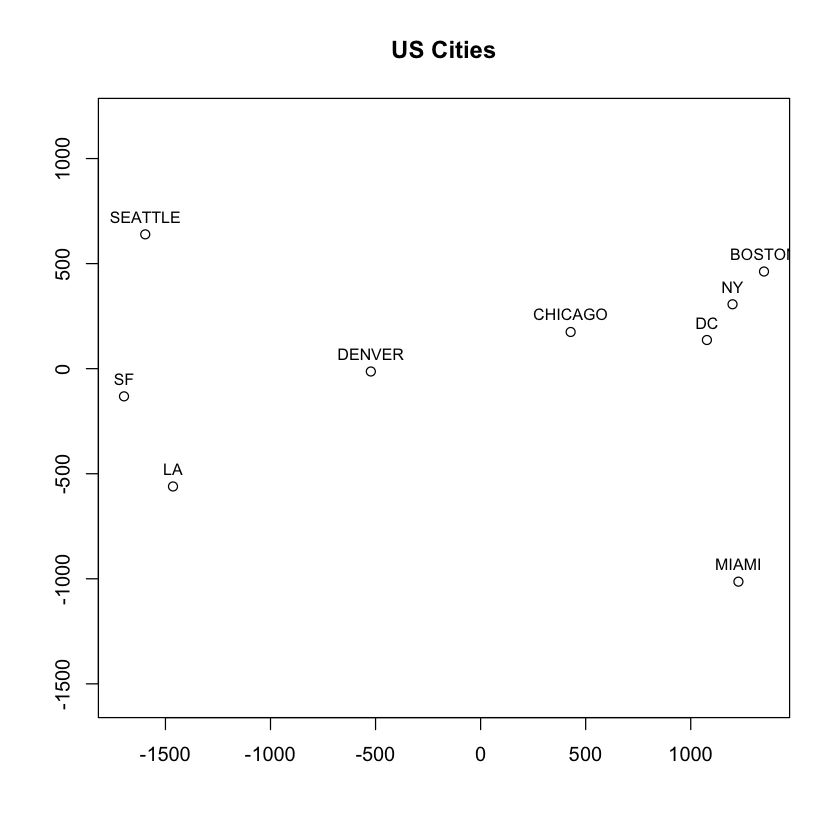

In [44]:
x <- mds[, 1]
y <- mds[, 2]

plot(x, y, 
     type = "p", 
     xlab = "", 
     ylab = "", 
     asp = 1, 
     axes = TRUE,
     main = "US Cities")
text(x, y,  rownames(mds), pos = 3, cex = 0.8)

In [50]:
# We can also use the smacof package to do metric multidimensional scaling. 
mds_ratio <- smacofSym(cities_distance, type = "ratio")
mds_ratio$stress

[1] 0.01410175

In [29]:
configuration <- as.data.frame(mds_ratio$conf)
configuration <- -configuration
configuration

,D1,D2
,<dbl>,<dbl>
BOSTON,0.6740040,0.23722686
NY,0.6025551,0.15791058
DC,0.5418110,0.05547398
MIAMI,0.6093672,-0.49366766
CHICAGO,0.2154022,0.07597718
SEATTLE,-0.7953302,0.31743077
SF,-0.8510109,-0.08612427
LA,-0.7351358,-0.25052795
DENVER,-0.2616624,-0.01369949


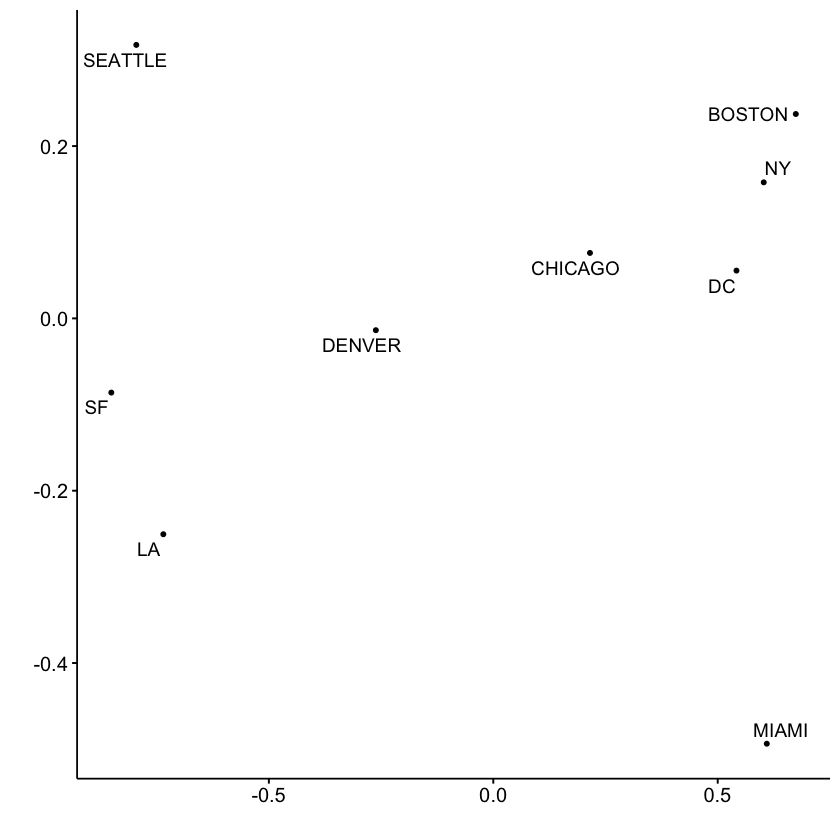

In [38]:
ggscatter(configuration, x = "D1", y = "D2",
          xlab = "", ylab = "",
          label = colnames(cities),
          size = 1,
          repel = TRUE)

# hierarchical clustering

We use the dendogram function from the factoextra package. 

We do the hierarchical clustering. The method indicates whether we choose single, complete or average

In [12]:
hc <- hclust(cities_distance, method = "complete")

Registered S3 method overwritten by 'dendextend':
  method     from 
  rev.hclust vegan



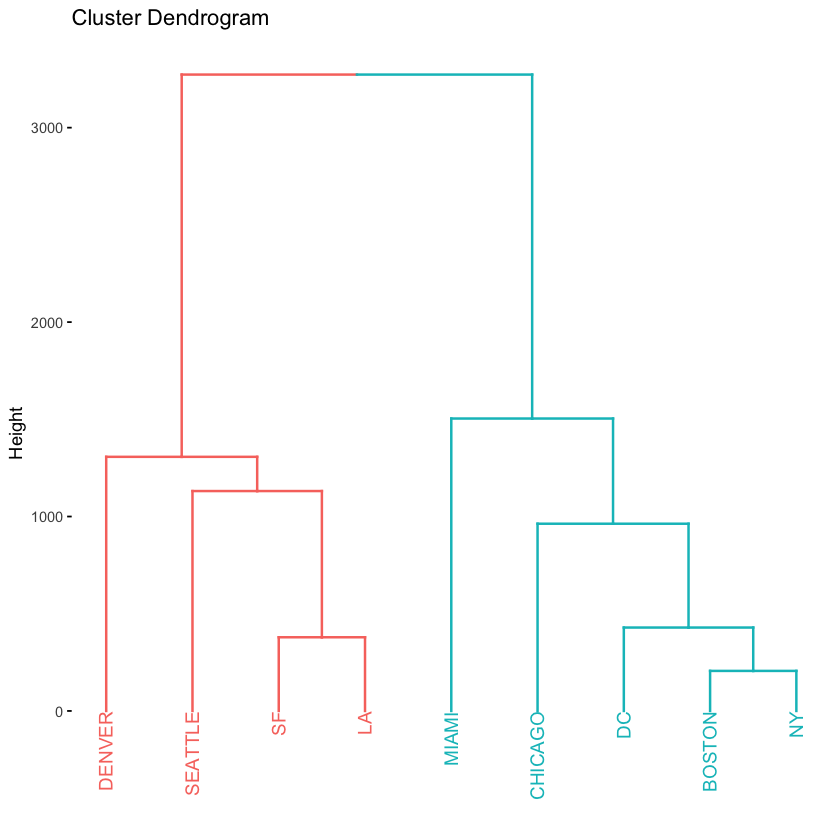

In [13]:
fviz_dend(hc, k = 2)

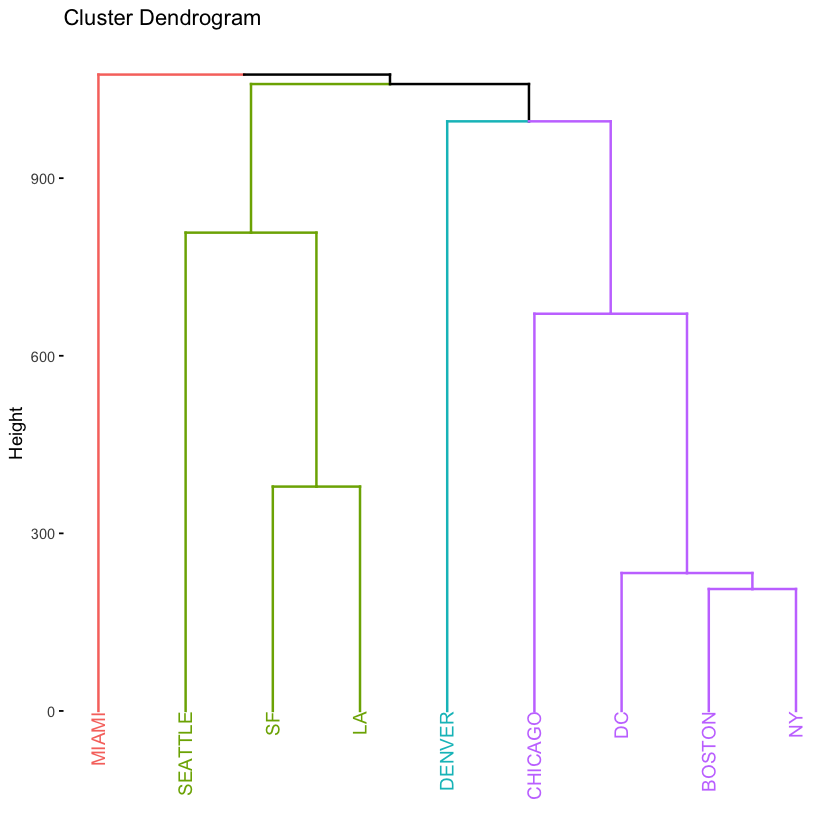

In [14]:
hc <- hclust(cities_distance, method = "single")
fviz_dend(hc, k = 4)

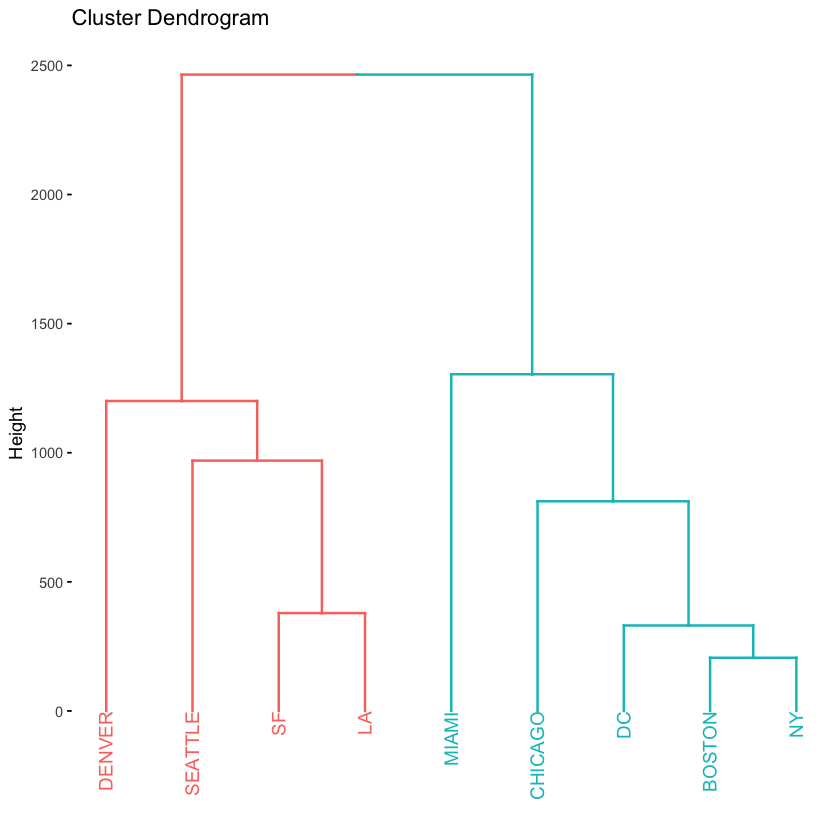

In [15]:
hc <- hclust(cities_distance, method = "average")
fviz_dend(hc, k = 2)

# Property fitting

We use envfit from `vegan` to do property fitting. We start again with a metric scaling, but we create a more basic plot.

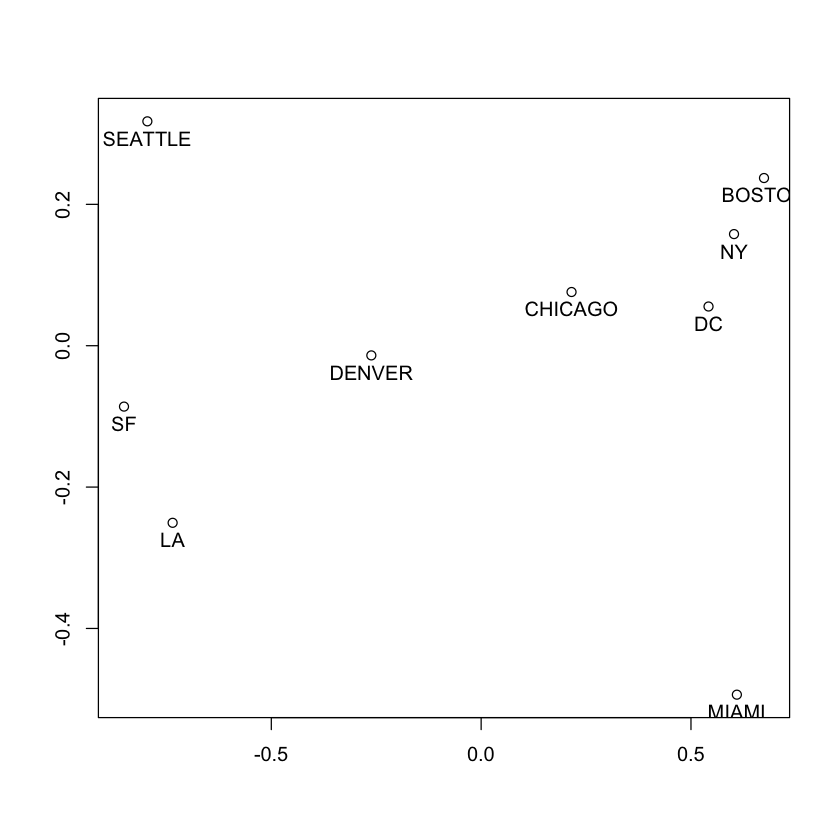

In [32]:
plot(configuration, 
     xlab = "",
     ylab = "", 
     axes = TRUE)
text(configuration, labels = rownames(configuration), pos = 1)

In [34]:
cities_coor <- read.csv2("../data/us_coor.csv", row.names = 1)
cities_coor

,latitude,longitude
,<int>,<int>
BOSTON,42,-71
NY,41,-74
DC,38,-77
MIAMI,25,-80
CHICAGO,41,-87
SEATTLE,47,-122
SF,37,-122
LA,34,-118
DENVER,39,-104


In [35]:
# We now use the envfit function from the vegan library
ord.fit <- envfit(configuration ~ longitude + latitude, data = cities_coor, perm = 999)
ord.fit


***VECTORS

                D1       D2     r2 Pr(>r)    
longitude  0.98802  0.15430 0.9945  0.002 ** 
latitude  -0.07934  0.99685 0.9873  0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 999



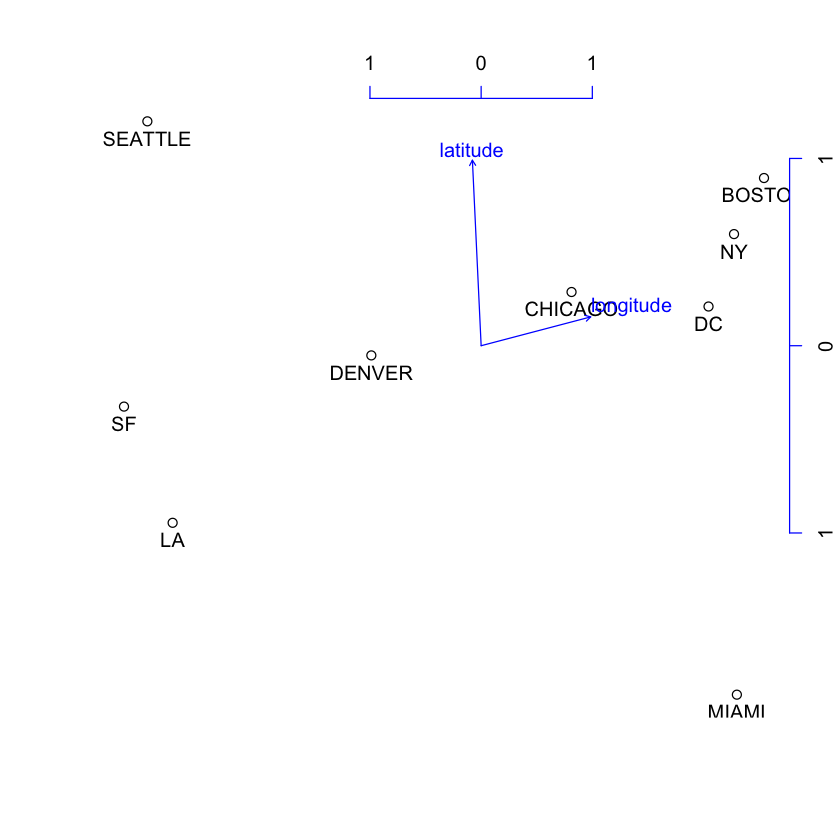

In [36]:
 # I'm not sure why, but seems like this is needed...
plot(configuration, 
     xlab = "",
     ylab = "", 
     axes = FALSE)
text(configuration, labels = rownames(configuration), pos = 1)
plot(ord.fit, choices = c(1, 2), axis = TRUE)